In [173]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
ner = spacy.load("en_core_web_sm")
df = pd.read_csv('liar2/train.csv')

In [175]:
""" df_sample = df.head(1000)
df_sample = df_sample[['label', 'statement']]
df_sample['label'] = df_sample['label'].isin([3, 4, 5]).astype(int)
df_sample.head() """

" df_sample = df.head(1000)\ndf_sample = df_sample[['label', 'statement']]\ndf_sample['label'] = df_sample['label'].isin([3, 4, 5]).astype(int)\ndf_sample.head() "

In [176]:
df = df[['label', 'statement']]
df['label'] = df['label'].isin([3, 4, 5]).astype(int)
df.head()

,label,statement
0,1,"90 percent of Americans ""support universal bac..."
1,0,Last year was one of the deadliest years ever ...
2,0,"Bernie Sanders's plan is ""to raise your taxes ..."
3,1,Voter ID is supported by an overwhelming major...
4,0,"Says Barack Obama ""robbed Medicare (of) $716 b..."


In [177]:
def extract_entities(text):
    doc = ner(str(text))
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER
df["named_entities"] = df["statement"].apply(extract_entities)

#for i in range(len(df['named_entities'])):
#    print(df['named_entities'][i])

for i in range(10):
    print(df['named_entities'][i])

[('90 percent', 'PERCENT'), ('Americans', 'NORP')]
[('Last year', 'DATE'), ('one', 'CARDINAL'), ('years', 'DATE')]
[("Bernie Sanders's", 'PERSON'), ('90 percent', 'PERCENT')]
[('NYers', 'ORG')]
[('Barack Obama', 'PERSON'), ('Medicare', 'ORG'), ('$716 billion', 'MONEY')]
[]
[('Jeff Reardon', 'PERSON')]
[('One', 'CARDINAL'), ('three', 'CARDINAL')]
[]
[('Joe Donnelly', 'PERSON')]


In [178]:
# Split dataset into true and false based on label
df_true = df[df['label'] == 1]
df_false = df[df['label'] == 0]

df_true['named_entities']

0               [(90 percent, PERCENT), (Americans, NORP)]
3                                           [(NYers, ORG)]
7                     [(One, CARDINAL), (three, CARDINAL)]
10                                                      []
12       [(Guantanamo, FAC), (ISIS, ORG), (al-Qaida, ORG)]
                               ...                        
18354    [(Connecticut, GPE), (fifth, ORDINAL), (35, CA...
18359                        [(just 3.6 percent, PERCENT)]
18360                                     [(40, CARDINAL)]
18361    [(Obama, PERSON), (40 percent, PERCENT), (nine...
18365                    [(Georgia, GPE), (180-day, DATE)]
Name: named_entities, Length: 7778, dtype: object

In [179]:
# Make new datasets with the entity and its corresponding label for analysis
temp = [(entity[0], entity[1]) for sublist in df_true['named_entities'] for entity in sublist]
df_true = pd.DataFrame(temp, columns=['entity', 'label'])

temp = [(entity[0], entity[1]) for sublist in df_false['named_entities'] for entity in sublist]
df_false = pd.DataFrame(temp, columns=['entity', 'label'])

In [180]:
print(df_true['entity'].value_counts())
print(df_true['label'].value_counts())

entity
Texas                         278
Obama                         244
Americans                     223
U.S.                          211
Wisconsin                     195
                             ... 
Pittsburgh                      1
$275 million                    1
a quarter-century               1
approximately $3.6 million      1
180-day                         1
Name: count, Length: 6155, dtype: int64
label
GPE            3445
PERSON         3101
DATE           2459
CARDINAL       2438
ORG            2197
NORP           1280
PERCENT        1209
MONEY          1207
ORDINAL         372
LOC             129
LAW             121
EVENT            86
TIME             68
QUANTITY         64
PRODUCT          55
FAC              54
WORK_OF_ART      52
LANGUAGE         15
Name: count, dtype: int64


C:\Users\lucan\AppData\Local\Temp\ipykernel_127184\401848055.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', fontsize=10)
C:\Users\lucan\AppData\Local\Temp\ipykernel_127184\401848055.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', fontsize=10)


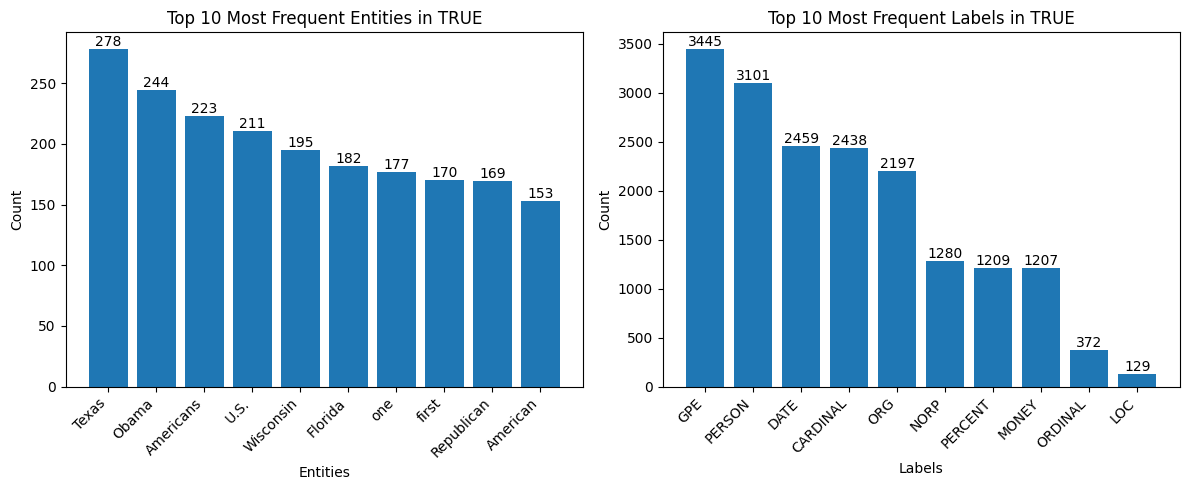

In [181]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first plot
entity_counts = df_true['entity'].value_counts().head(10)
bars1 = ax[0].bar(entity_counts.index, entity_counts.values)
ax[0].set_xlabel("Entities")
ax[0].set_ylabel("Count")
ax[0].set_title("Top 10 Most Frequent Entities in TRUE")
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', fontsize=10)
ax[0].bar_label(bars1)  # add counts on top

# second plot
label_counts = df_true['label'].value_counts().head(10)
bars2 = ax[1].bar(label_counts.index, label_counts.values)
ax[1].set_xlabel("Labels")
ax[1].set_ylabel("Count")
ax[1].set_title("Top 10 Most Frequent Labels in TRUE")
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', fontsize=10)
ax[1].bar_label(bars2)  # add counts on top

plt.tight_layout()
plt.show()

In [182]:
print(df_false['entity'].value_counts())
print(df_false['label'].value_counts())

entity
U.S.                   371
Obama                  330
Donald Trump           267
Joe Biden              262
Trump                  253
                      ... 
2 months                 1
Amy Coney Barrett's      1
five days                1
less than 30 days        1
18 million               1
Name: count, Length: 7478, dtype: int64
label
PERSON         5930
GPE            4214
ORG            3817
DATE           2093
CARDINAL       1963
NORP           1597
MONEY          1026
PERCENT         706
ORDINAL         279
LOC             176
WORK_OF_ART     172
FAC             140
LAW             133
TIME            132
EVENT            99
PRODUCT          95
QUANTITY         70
LANGUAGE         19
Name: count, dtype: int64


C:\Users\lucan\AppData\Local\Temp\ipykernel_127184\4096937740.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', fontsize=10)
C:\Users\lucan\AppData\Local\Temp\ipykernel_127184\4096937740.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', fontsize=10)


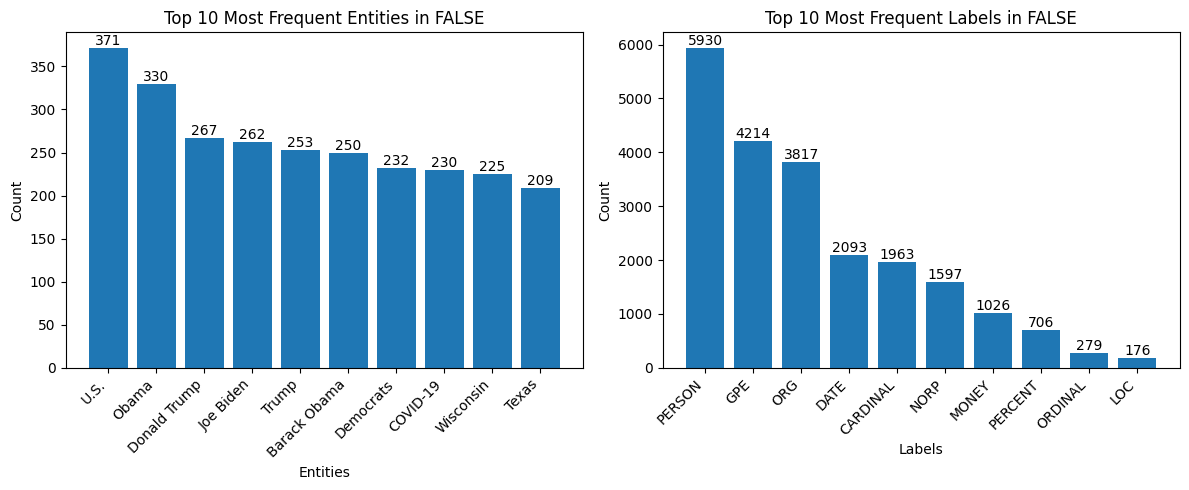

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first plot
entity_counts = df_false['entity'].value_counts().head(10)
bars1 = ax[0].bar(entity_counts.index, entity_counts.values)
ax[0].set_xlabel("Entities")
ax[0].set_ylabel("Count")
ax[0].set_title("Top 10 Most Frequent Entities in FALSE")
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', fontsize=10)
ax[0].bar_label(bars1)  # add counts on top

# second plot
label_counts = df_false['label'].value_counts().head(10)
bars2 = ax[1].bar(label_counts.index, label_counts.values)
ax[1].set_xlabel("Labels")
ax[1].set_ylabel("Count")
ax[1].set_title("Top 10 Most Frequent Labels in FALSE")
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', fontsize=10)
ax[1].bar_label(bars2)  # add counts on top

plt.tight_layout()
plt.show()